#  (MAS473) Introduction to Artificial Intelligence with Mathematics
# Homework #4: Support Vector Machine

TA : Wonyeong Song, lcre47@kaist.ac.kr

Due Date : Nov 10(Fri) 23:59

In HW4, you should submit following file:
- `hw4_StudentID.ipynb`: a **completed** version of this IPython notebook.
  - **Do NOT clear** your outputs (ex. plots, outputs, etc.).  

First of all, you should copy the original Colab notebook into your Google drive.
  - Sign in Google.
  - Click `File` in the left top on menu and select `Save a copy in Drive..`.
- Then you can edit your copied notebook in Google Colab!
  - Fill in the `Edit here` marked part to run appropriately.
  - Each code cell will be executed when you click the play button left side of the cell (or press `Ctrl+Enter`).
- Download your copied notebook file (`.ipynb` file) to your local and rename it as the following:

**Please submit the notebook file (without compressing) with the name like below:**

**hw4_StudentID.ipynb**

**ex) hw4_20191234.ipynb**

---

# 0. Prerequisites

This homework uses **NumPy** and **sklearn.svm.SVC**.
If you are not familiar with them, please read documents below.

**NumPy**

https://numpy.org/doc/stable/

**sklearn.svm.SVC**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

You can use following packages in this HW :

In [16]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import random
import numpy as np
import matplotlib.pyplot as plt



#HW 1. Role of regularization parameter

We learned that SVM with hinge loss can be written as follows :

$\arg\min \frac{1}{2}\lVert \mathbf{w}\rVert^2 + C\sum_{n=1}^N \max \left\{ 0, 1-y_n(\mathbf{w}^\top \mathbf{x}_n+b) \right\} $

If $C$ **is large**, then SVM tends to make hinge loss term to zero. In other words, it tends to classify all training data exactly. This is similar to **hard-margin SVM**.

On the other hand, if $C$ **is small**, SVM concentrates on maximizing margin even though it may causes some training error. This is similar to **soft-margin SVM**.

The purpose of this problem is to experience this tendency. In this problem we will use dataset below.

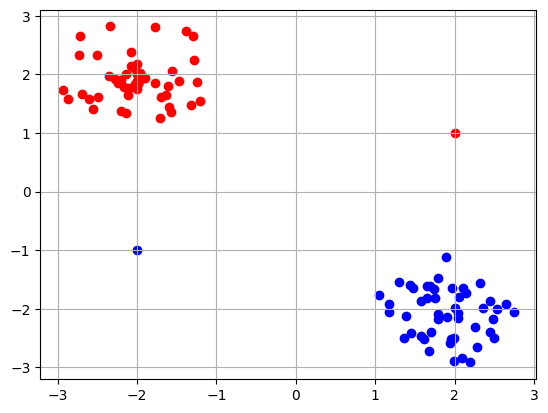

In [17]:
X=[]
Y=[]

i=0
while i<49:
  r=random.random()
  a=2*np.pi*random.random()
  x=-2+r*np.cos(a)
  y=2+r*np.sin(a)
  X.append([x,y])
  Y.append(1)
  i=i+1

X.append([2,1])
Y.append(1)

j=0
while j<49:
  r=random.random()
  a=2*np.pi*random.random()
  x=2+r*np.cos(a)
  y=-2+r*np.sin(a)
  X.append([x,y])
  Y.append(-1)
  j=j+1

X.append([-2,-1])
Y.append(-1)

X1 = [d[0] for d in X]
X2 = [d[1] for d in X]
plt.scatter(X1[:50], X2[:50],c='red')
plt.scatter(X1[50:], X2[50:],c='blue')
plt.grid(True)


As you can see, there is one cluster and one outlier per class. Now, your task is following.

1. Implement the code so that you can **plot decision hyperplane**.

2. Observe what happens when parameter $C$ is very small or very large. Explain you observed by relating them to hard/soft SVM.

To solve this problem, you may need to know about following attributes of *sklearn.svm.SVC*:

**coef_** : Return weights assigned to the features when kernel='linear'.

**intercept_** : Return constants in decision function.

For more information, please read document about *sklearn.svm.SVC* linked above.

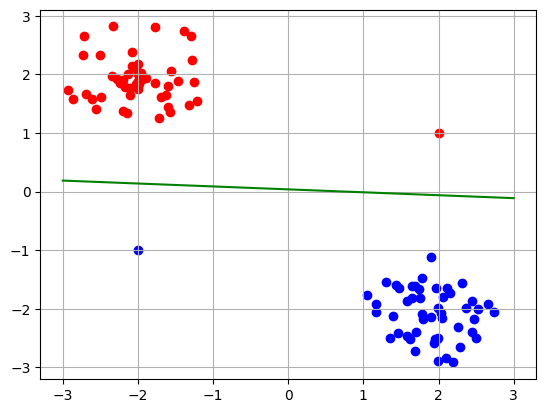

In [18]:
#train SVM
model=SVC(kernel='linear', C=1) #Edit here: Try various C
clf=model.fit(X,Y)

#Construct decision boundary
w=clf.coef_[0]
b=clf.intercept_[0]
x_points = np.linspace(-3,3)
y_points = -(w[0]*x_points + b)/w[1]#Edit here

#plot decision boundary
plt.scatter(X1[:50], X2[:50],c='red')
plt.scatter(X1[50:], X2[50:],c='blue')
plt.plot(x_points, y_points, c='green')
plt.grid(True)


 
### Explanation about the result
For comparing the result between C=1 versus C=0.01, we see that 
1. The decision boundary is similar to the hard margin classifier if C=1. 
This is because we give a large weight to loss generated by misclassified(or has small margin) data

2. On the other hand, if C=0.01, which is relatively a small value, we allow small margin or misclassification for the outliers while keeping larger margin for the majority of the data. 

#HW 2. Role of Support Vectors

You learned that **decision boundary is determined only by the support vectors**. The purpose of this problem is to experience this phenomenon. In this problem we will use dataset below.

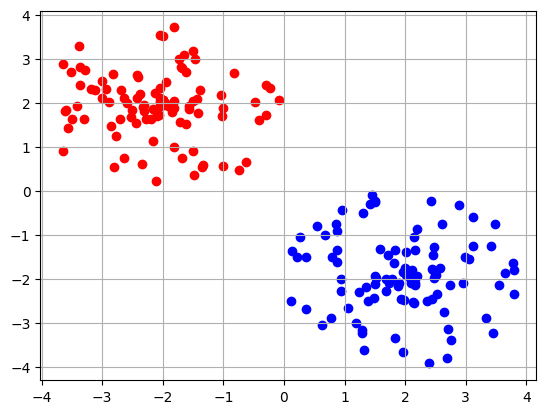

In [19]:
X=[]
Y=[]

random.seed(1)

i=0
while i<100:
  r=2*random.random()
  a=2*np.pi*random.random()
  x=-2+r*np.cos(a)
  y=2+r*np.sin(a)
  X.append([round(x,2),round(y,2)])
  Y.append(1)
  i=i+1

j=0
while j<100:
  r=2*random.random()
  a=2*np.pi*random.random()
  x=2+r*np.cos(a)
  y=-2+r*np.sin(a)
  X.append([round(x,2),round(y,2)])
  Y.append(-1)
  j=j+1

X1 = [d[0] for d in X]
X2 = [d[1] for d in X]
plt.scatter(X1[:100], X2[:100],c='red')
plt.scatter(X1[100:], X2[100:],c='blue')
plt.grid(True)

Your task for this problem is following:

1. **Find support vectors.**

2. Implement the code that **extracts support vectors and corresponding labels**. They should be saved as $X_{supp}$ and $Y_{supp}$, respectively.

3. Train SVM with $X_{supp}$ and $Y_{supp}$, and check that **decision boundary almost did not changed**.


To solve this problem, you may need to know about following attributes of *sklearn.svm.SVC*:

**support_vectors_** : Return support vectors.

**support_** : Return indices of support vectors.

**n_support_** : Return number of support vectors for each class.

For more information, please read document about *sklearn.svm.SVC* linked above.

In [20]:
#train by full dataset
model=SVC(kernel='linear', C=1000)
clf=model.fit(X,Y)

#parameters trained by full dataset
w_pre=clf.coef_[0]
b_pre=clf.intercept_[0]
print(w_pre)
print(b_pre)

#Edit here
#---------
idx = clf.support_
print(f'index of support vectors: {idx}')
X_supp=[X[i] for i in idx]
Y_supp=[Y[i] for i in idx]
#---------
#Edit here

#train by support vectors only
clf2=model.fit(X_supp,Y_supp)

#parameters trained by support vectors only
w_post=clf2.coef_[0]
b_post=clf2.intercept_[0]
print(w_post)
print(b_post)


[-0.72586255  0.8327696 ]
0.07149813616099643
index of support vectors: [106 132  20]
[-0.72546364  0.83303033]
0.0715246957278984


### Analysis
To interprete the above result, 
(w, b) obtained by only support vectors are almost the same as those obtained from the whole data. 
Small difference is due to the numerical error while solving the optimizer. 

#HW 3. Kernel Trick

In this problem you will learn how to deal with non-separable(by hyperplane) dataset by using kernel trick.

The basic idea of kernel trick is that mapping features into higher dimension. For example, 3D points inside a sphere and points outside a sphere cannot be separated by any hyperplane. However, if we use following feature mapping:

$\phi(x,y,z)=(x,y,z,x^2+y^2+z^2)$

Then we can separate dataset via fourth feature $x^2+y^2+z^2$.


In this problem, **you need to find appropriate feature map to separate two classes via a line**.

The following dataset will be used for this problem.

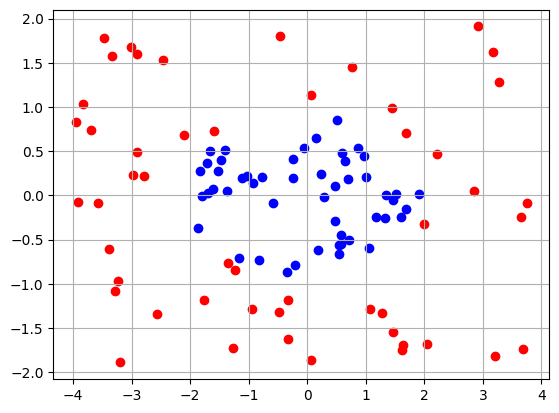

In [21]:
X1=[[1.08, -1.28], [-2.78, 0.22], [1.62, -1.75], [-0.48, -1.32], [0.76, 1.45], [-2.46, 1.53], [-2.56, -1.34], [3.17, 1.62], [-2.97, 0.23], [2.22, 0.47], [-3.19, -1.89], [-3.38, -0.61], [-0.32, -1.62], [-0.32, -1.18], [-3.95, 0.83], [-3.57, -0.09], [-0.46, 1.80], [3.75, -0.09], [3.28, 1.28], [2.85, 0.05], [-2.91, 1.60], [1.28, -1.33], [1.44, 0.99], [2.00, -0.32], [-3.29, -1.08], [-1.36, -0.77], [3.69, -1.74], [-3.01, 1.68], [-3.23, -0.97], [-1.76, -1.18], [3.65, -0.24], [-3.47, 1.78], [-1.59, 0.73], [-2.10, 0.68], [0.06, 1.14], [-0.94, -1.28], [1.64, -1.69], [1.69, 0.70], [-3.69, 0.74], [-1.24, -0.84], [-3.92, -0.08], [-2.90, 0.49], [1.46, -1.55], [-3.83, 1.03], [3.21, -1.82], [2.05, -1.68], [2.92, 1.91], [0.07, -1.86], [-3.33, 1.58], [-1.27, -1.73], [0.18, -0.62], [-1.86, -0.37], [1.05, -0.60], [-0.20, -0.79], [0.59, 0.48], [0.97, 0.45], [-0.34, -0.87], [-1.52, 0.27], [-1.12, 0.20], [0.47, -0.29], [0.65, 0.39], [-1.37, 0.05], [-1.47, 0.40], [0.51, 0.85], [1.33, -0.26], [1.91, 0.02], [-0.24, 0.41], [-1.69, 0.03], [-1.40, 0.51], [-1.02, 0.22], [0.70, 0.18], [0.72, -0.50], [-1.16, -0.71], [0.28, -0.02], [-1.83, 0.28], [1.69, -0.15], [-0.05, 0.54], [0.58, -0.45], [0.15, 0.65], [-0.24, 0.20], [0.57, -0.55], [1.35, 0.00], [0.55, -0.66], [-1.66, 0.50], [1.00, 0.21], [1.51, 0.01], [1.17, -0.24], [-0.58, -0.09], [-1.71, 0.37], [0.24, 0.24], [-0.77, 0.21], [0.87, 0.53], [0.48, 0.11], [-1.61, 0.07], [-0.82, -0.73], [-1.80, -0.01], [0.55, -0.56], [1.60, -0.25], [1.47, -0.05], [-0.93, 0.14]]

X11 = [d[0] for d in X1]
X12 = [d[1] for d in X1]
plt.scatter(X11[:50], X12[:50],c='red')
plt.scatter(X11[50:], X12[50:],c='blue')
plt.grid(True)

Y1=[1]*50+[-1]*50

As you can see, two classes cannot be separated by a line.
Your task is following:

1. **find appropriate transformation** so that two dataset can be separated by a line after transformation.

2. Make $tX_1$, transformed dataset via transformation you found, then train SVM with it. After a transformation, **More than 95% of data should be separated by linear kernel SVM.** In other words, **"Accuracy" should be higher than 0.95**.

Hint : One data class is inside of **ellipse**, and another class is outside of **ellipse**.

In [26]:
def transform(X):
  return np.array([[x[0], x[1], x[0]**2 + 5*x[1]**2] for x in X]) #x^2 + 5y^2

#Transform dataset via transformation you found
tX1=transform(X1)

#Train SVM with transformed dataset
clf1=LinearSVC(C=100, max_iter=100000)
clf1.fit(tX1,Y1)

#Train accuracy
print("Accuracy :", np.mean(clf1.predict(tX1)==Y1))

Accuracy : 1.0


C:\Users\kyuju\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Now, do the same thing with new dataset. Again, after transformation, **More than 95% of data should be separated by linear kernel SVM.**

**Hint : Look at auxiliary line I gave.**

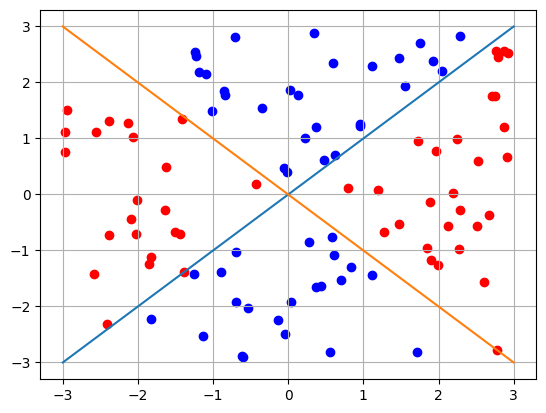

In [23]:
X2=[[2.29, -0.27], [0.80, 0.12], [-0.43, 0.19], [-2.39, 1.32], [2.75, 1.76], [2.27, -0.98], [1.20, 0.08], [-2.01, -0.10], [2.25, 0.99], [-2.39, -0.73], [2.79, 2.46], [2.71, 1.76], [1.47, -0.53], [-2.09, -0.43], [-1.41, 1.35], [2.76, 2.57], [-2.59, -1.42], [2.51, -0.56], [-1.83, -1.12], [2.61, -1.56], [1.27, -0.67], [2.67, -0.36], [-1.85, -1.24], [-2.97, 0.76], [1.96, 0.78], [-2.95, 1.50], [1.99, -1.26], [-2.03, -0.70], [2.52, 0.59], [2.87, 1.20], [1.73, 0.96], [2.87, 2.57], [2.78, -2.77], [-2.13, 1.28], [2.93, 2.53], [1.85, -0.96], [-1.39, -1.38], [2.91, 0.67], [-1.51, -0.67], [-1.44, -0.71], [-2.97, 1.12], [2.19, 0.02], [-2.06, 1.03], [-1.62, 0.49], [2.12, -0.57], [-1.64, -0.28], [1.90, -1.17], [-2.56, 1.12], [-2.41, -2.32], [1.88, -0.13], [-0.04, -2.50], [0.83, -1.30], [0.37, -1.65], [2.04, 2.20], [0.34, 2.88], [0.58, -0.76], [-0.70, -1.92], [0.22, 1.00], [-0.05, 0.48], [0.27, -0.84], [-0.86, 1.85], [0.70, -1.53], [1.71, -2.82], [-0.13, -2.24], [-0.35, 1.54], [-1.02, 1.49], [1.76, 2.70], [0.47, 0.61], [-1.23, 2.47], [1.47, 2.44], [2.28, 2.83], [-1.24, 2.54], [1.12, -1.44], [-0.84, 1.78], [0.04, -1.92], [-1.26, -1.42], [-1.19, 2.19], [-1.10, 2.15], [1.92, 2.39], [0.13, 1.77], [-0.54, -2.02], [0.37, 1.21], [-0.70, -1.02], [0.95, 1.23], [0.61, -1.08], [-0.01, 0.40], [0.95, 1.26], [0.44, -1.64], [-0.62, -2.88], [0.59, 2.35], [-0.71, 2.82], [-1.13, -2.52], [0.55, -2.81], [-0.89, -1.39], [1.11, 2.30], [-0.60, -2.91], [1.56, 1.93], [0.62, 0.71], [0.02, 1.87], [-1.82, -2.23]]

X21 = [d[0] for d in X2]
X22 = [d[1] for d in X2]

x= np.linspace(-3,3)
y1 = x
y2 = -x

plt.scatter(X21[:50], X22[:50],c='red')
plt.scatter(X21[50:], X22[50:],c='blue')
plt.plot(x,y1)
plt.plot(x,y2)
plt.grid(True)

Y2=[1]*50+[-1]*50

In [27]:
def transform(X):
  return np.array([[x[0],x[1], x[0]**2-x[1]**2] for x in X]) #(x-y)(x+y) = x^2-y^2

#Transform dataset via transformation you found
tX2=transform(X2)

#Train SVM with transformed dataset
clf2=LinearSVC(C=100, max_iter=100000)
clf2.fit(tX2,Y2)

#Train accuracy
print("Accuracy:", np.mean(clf2.predict(tX2)==Y2))

Accuracy: 1.0


C:\Users\kyuju\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
